# core

> Fill in a module description here

In [47]:
#| default_exp core

In [48]:
#| hide
from nbdev.showdoc import *

In [49]:
#| export
import matplotlib.pyplot as plt
from sympy import *
import sympy

class Graph_free_market:
    def __init__(self) -> None:
        pass
        
    
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)
        

    def market_graph(self, supply: str, demand: str, start: int, end: int, step: int, complete = False) -> None:
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)

        supply = self.get_calculate_values(supply, start, end, step)
        demand = self.get_calculate_values(demand, start, end, step)

        if complete == True:
            plt.plot([i for i in range(0, round(quantity) + 1)], [price for i in range(0, round(quantity) + 1)],
                     linestyle = "dashed", label = f"Price*: {price}")
            plt.plot([quantity for i in range(0, round(price) + 1 )], [i for i in range(0,round(price) + 1)],
                     linestyle = "dashed", label = f"Quantity*: {quantity}")


     
        plt.plot(supply.keys(),supply.values(), label = "Supply") 
        plt.plot(demand.keys(),demand.values(), label = "Demand") 

        

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()


    def get_calculate_values(self, expression: str, start: int, end: int, step: int) -> dict:
        #from sympy import symbols, parse_expr,solve, Eq
        value_pairs = {}
        equation_function = self.create_equation_function(expression)
        if equation_function:
            x_values = [i for i in range(start, end, step)]
            for x_val in x_values:
                result = equation_function(x_val)
                value_pairs[x_val] = result
                
               # print(f"For x = {x_val}, the result is {result}")

        else:
            print("Error: Unable to create the equation function.")
        return value_pairs


    def create_equation_function(self, equation_str: str) -> str:
        x = symbols('x')
        
        try:
            equation = parse_expr(equation_str)
            equation_function = lambda x_val: equation.subs(x, x_val)
            return equation_function
        except Exception as e:
            return None


    def get_quantity(self, supply: str, demand: str) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        quantity = max(solve(Eq(supply_eq, demand_eq), x))
        return round(quantity)
    

    def get_price(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        print(supply_eq, demand_eq)

        inverse_supply = solve(supply_eq - y, x)[0]
        inverse_demand = solve(demand_eq - y, x)[0]
        

        price = max(solve(Eq(inverse_supply, inverse_demand), y))
        
        return round(price)

        
    def get_consumer_surplus(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        # Define the inverse demand function (price as a function of quantity)
        consumer_surplus = parse_expr(f"{demand}-{price}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(consumer_surplus, (x, 0, quantity)) 
        
        return round(surplus)
    

    def get_producer_surplus(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        # Define the inverse demand function (price as a function of quantity)
        inverse_supply = solve(supply_eq - y, x)[0]

        producer_surplus = parse_expr(f"{quantity}-{inverse_supply}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(producer_surplus, (y, 0, price)) 
        
        return round(surplus)


    def get_economic_surplus(self, supply: str, demand: str) -> float:
        consumer = self.get_consumer_surplus(supply, demand)
        producer = self.get_producer_surplus(supply, demand)
        economic_surplus = consumer + producer
        return economic_surplus

supply function 1 + 2 * x
demand function 6 - 5 * x
zero_points 6/5
price is around 2.429
zero_points 6/5
end is 1
result from rational is 3.0
result from rational is 3.0
supply_dict{0: 1.0, 1: 3.0}
result from rational is 1.0
result from rational is 1.0
demand_dict{0: 1.0, 1: 3.0}
x_range is: [0.         0.71428571]
supply curve is:[1. 3.]
demand curve is: [6. 1.]
price curve is: [2.42857143 2.42857143]


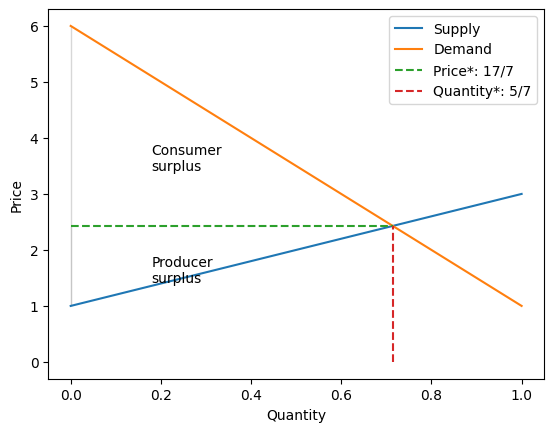

supply function 0 + 5 * x
demand function 8 - 2 * x
zero_points 4
price is around 5.714
zero_points 4
end is 4
result from rational is 20.0
supply_dict{0: 0.0, 1: 5.0, 2: 10.0, 3: 15.0, 4: 20.0}
result from rational is 0.0
demand_dict{0: 0.0, 1: 5.0, 2: 10.0, 3: 15.0, 4: 20.0}
x_range is: [0.         1.14285714]
supply curve is:[0. 5.]
demand curve is: [8. 6.]
price curve is: [5.71428571 5.71428571]


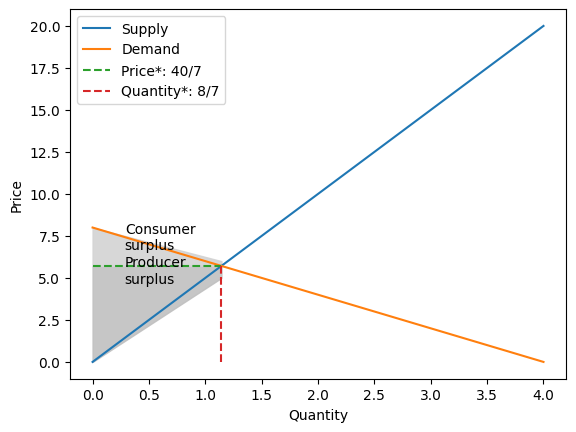

supply function 0 + 1 * x
demand function 10 - 5 * x
zero_points 2
price is around 1.667
zero_points 2
end is 2
result from rational is 2.0
supply_dict{0: 0.0, 1: 1.0, 2: 2.0}
result from rational is 0.0
demand_dict{0: 0.0, 1: 1.0, 2: 2.0}
x_range is: [0.         1.66666667]
supply curve is:[0. 1.]
demand curve is: [10.  5.]
price curve is: [1.66666667 1.66666667]


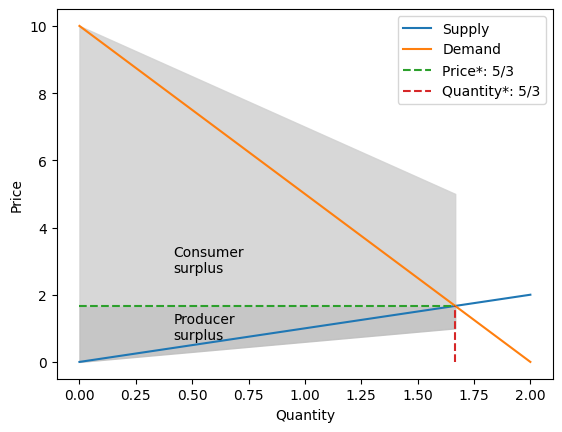

supply function 1 + 1 * x
demand function 5 - 5 * x
zero_points 1
price is around 1.667
zero_points 1
end is 1
result from rational is 2.0
result from rational is 2.0
supply_dict{0: 1.0, 1: 2.0}
result from rational is 0.0
result from rational is 0.0
demand_dict{0: 1.0, 1: 2.0}
x_range is: [0.         0.66666667]
supply curve is:[1. 2.]
demand curve is: [5. 0.]
price curve is: [1.66666667 1.66666667]


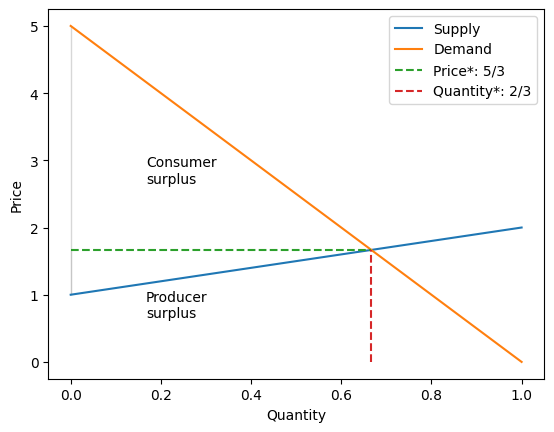

supply function 1 + 2 * x
demand function 9 - 1 * x
zero_points 9
price is around 6.333
zero_points 9
end is 9
result from rational is 19.0
supply_dict{0: 1.0, 1: 3.0, 2: 5.0, 3: 7.0, 4: 9.0, 5: 11.0, 6: 13.0, 7: 15.0, 8: 17.0, 9: 19.0}
result from rational is 0.0
demand_dict{0: 1.0, 1: 3.0, 2: 5.0, 3: 7.0, 4: 9.0, 5: 11.0, 6: 13.0, 7: 15.0, 8: 17.0, 9: 19.0}
x_range is: [0.         1.         2.66666667]
supply curve is:[1. 3. 5.]
demand curve is: [9. 8. 7.]
price curve is: [6.33333333 6.33333333 6.33333333]


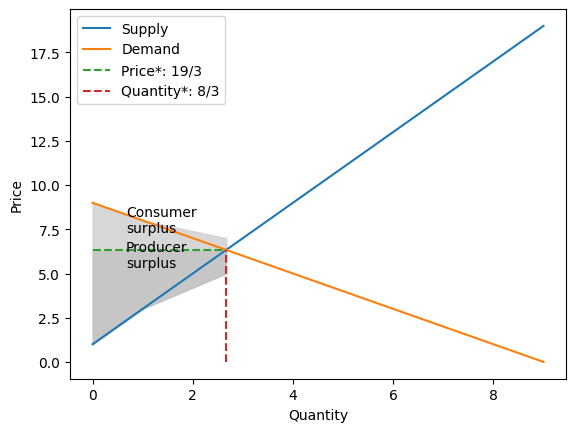

In [2]:
#| export
from free_comp import Graph_free_market
import matplotlib.pyplot as plt
from sympy import *
import sympy
import numpy as np
import random
import math


if __name__ == "__main__":
    
        for i in range(0, 5):
            a = random.randint(1,5)
            b = random.randint(5,10)
            c = random.randint(1,5)
            d = random.randint(0,1)
            
            graph = Graph_free_market()
            supply_function = f"{d} + {c} * x"
            demand_function = f"{b} - {a} * x"

            print(f"supply function {supply_function}\ndemand function {demand_function}")
            graph.market_graph(supply_function, demand_function, complete=True)

        """ graph = Graph_free_market()
        supply_function = f"{0} + {4} * x"
        demand_function = f"{5} - {1} * x"
        graph.market_graph(supply_function, demand_function, complete=True) """
        
        """ print(f"supply function {supply_function}\ndemand function {demand_function}")
        
        consumer_surplus = graph.get_consumer_surplus(supply_function, demand_function)
        print("Consumer Surplus:", consumer_surplus)

        producer_surplus = graph.get_producer_surplus(supply_function, demand_function)
        print("Producer Surplus:", producer_surplus)

        economic_surplus = graph.get_economic_surplus(supply_function, demand_function)

        print("Economic Surplus:", economic_surplus)
        
        graph.market_graph(supply_function, demand_function, complete=True) """
        
        """ price = graph.get_price(supply_function, demand_function)
        quantity = graph.get_quantity(supply_function, demand_function)
        print(f"Price: {price}, Quantity: {quantity}")
         """
        """ graph = Graph_monopoly()
        supply = "2"
        demand = "50 -  x**2"
        graph.market_graph(supply, demand,0, 12, 1, complete=True, is_tot_cost = False) """

In [50]:
#| export
import matplotlib.pyplot as plt
from sympy import *
import sympy
class Graph_monopoly(Graph_free_market):
    def __init__(self) -> None:
        super().__init__()
        
    
    def market_graph(self, supply: str, demand: str, start: int, end: int, step: int, complete = False, is_tot_cost = False) -> None:
        x = symbols('x')
        
        if is_tot_cost == True:
            supply_parsed = parse_expr(supply)
            marginal_cost = diff(supply_parsed, x)
        
        demand_parsed = parse_expr(demand)
        marginal_revenue = diff(demand_parsed, x)
        
        
        
        supply, demand =str(marginal_cost), str(marginal_revenue)
        
        
        
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)

        supply = self.get_calculate_values(supply, start, end, step)
        demand = self.get_calculate_values(demand, start, end, step)

        if complete == True:
            plt.plot([i for i in range(0, round(quantity) + 1)], [price for i in range(0, round(quantity) + 1)],
                     linestyle = "dashed", label = f"Price*: {price}")
            plt.plot([quantity for i in range(0, round(price) + 1 )], [i for i in range(0,round(price) + 1)],
                     linestyle = "dashed", label = f"Quantity*: {quantity}")


     
        plt.plot(supply.keys(),supply.values(), label = "Supply") 
        plt.plot(demand.keys(),demand.values(), label = "Demand") 

        

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()


    


    
        
        
        
        
    
    
        
        # return super().market_graph(supply, demand, start, end, step, complete)
        



4*x 50 - 6*x


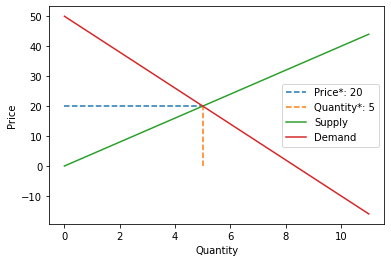

In [51]:
graph = Graph_monopoly()
supply = "2*x**2"
demand = "50*x -  3*x**2"
graph.market_graph(supply, demand,0, 12, 1, complete=True, is_tot_cost = True)

In [52]:
graph = Graph_free_market()
supply_function = " x*2"
demand_function = "1000 -  3*x**2"

In [53]:


consumer_surplus = graph.get_consumer_surplus(supply_function, demand_function)
print("Consumer Surplus:", consumer_surplus)

producer_surplus = graph.get_producer_surplus(supply_function, demand_function)
print("Producer Surplus:", producer_surplus)

economic_surplus = graph.get_economic_surplus(supply_function, demand_function)

print("Economic Surplus:", economic_surplus)


2*x 1000 - 3*x**2


Consumer Surplus: 12834
2*x 1000 - 3*x**2
Producer Surplus: -1008
2*x 1000 - 3*x**2
2*x 1000 - 3*x**2
Economic Surplus: 11826


2*x 1000 - 3*x**2


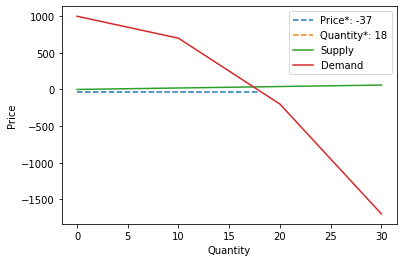

In [54]:
# find inverse of the supply and demand and then calculate the price
graph.market_graph(supply_function, demand_function,0, 40, 10, complete=True)

In [55]:
price = graph.get_price(supply_function, demand_function)
quantity = graph.get_quantity(supply_function, demand_function)
print(f"Price: {price}, Quantity: {quantity}")

2*x 1000 - 3*x**2
Price: -37, Quantity: 18


In [56]:
#| hide
import nbdev; nbdev.nbdev_export()